<a href="https://colab.research.google.com/github/jennadof/decisiontree/blob/main/Baggingand_BoostingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

In [210]:
data = pd.read_csv("/content/talking_data.csv")

In [211]:
data.head(10)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
5,93663,3,1,17,115,2017-11-09 01:22:13,NaN,0
6,17059,1,1,17,135,2017-11-09 01:17:58,NaN,0
7,121505,9,1,25,442,2017-11-07 10:01:53,NaN,0
8,192967,2,2,22,364,2017-11-08 09:35:17,NaN,0
9,143636,3,1,19,135,2017-11-08 12:35:26,NaN,0


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [213]:
#Printing Dimension of datasets
print("Dimension of dataset:", data.shape)
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])

Dimension of dataset: (100000, 8)
Number of rows in the dataset: 100000
Number of columns in the dataset: 8


In [214]:
# printing attributes (columns) name
print("Column Names:",data.columns.values)

Column Names: ['ip' 'app' 'device' 'os' 'channel' 'click_time' 'attributed_time'
 'is_attributed']


In [215]:
# getting discriptive statistcs (Summary of the data)
data.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [216]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [217]:
data.isnull().values.any()

True

In [218]:
data['attributed_time'].value_counts()

2017-11-08 02:22:38    1
2017-11-09 14:22:16    1
2017-11-08 04:35:54    1
2017-11-08 06:19:51    1
2017-11-09 08:57:08    1
                      ..
2017-11-07 08:08:09    1
2017-11-09 10:47:54    1
2017-11-09 11:50:42    1
2017-11-08 15:26:07    1
2017-11-08 15:09:40    1
Name: attributed_time, Length: 227, dtype: int64

In [219]:
# Delete the rows which column 'poutcome' contains 'other'
#other = data.attributed_time == 'click_time'
data1 = data.drop(['attributed_time'], axis = 1, inplace = True)

#data[['attributed_time']] = data[['attributed_time']].replace(['click_time'],'is_attributed')
data.head(10)
data



,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0
...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,0


In [220]:
corr = data.corr()
corr

,ip,app,device,os,channel,is_attributed
ip,1.000000,0.010400,-0.001499,-0.000470,0.007563,0.054955
app,0.010400,1.000000,0.248376,0.247160,-0.028238,0.064426
device,-0.001499,0.248376,1.000000,0.924456,-0.035398,-0.000695
os,-0.000470,0.247160,0.924456,1.000000,-0.033175,0.006183
channel,0.007563,-0.028238,-0.035398,-0.033175,1.000000,-0.023336
is_attributed,0.054955,0.064426,-0.000695,0.006183,-0.023336,1.000000


In [ ]:
#heat map

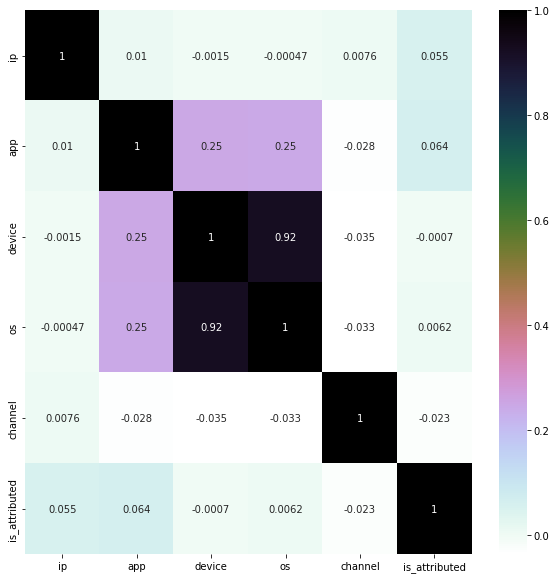

In [221]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap ='cubehelix_r')
plt.show()

In [222]:
def timefeatures(data):
  data['datetime'] = pd.to_datetime(data['click_time'])
  data['day'] = data['datetime'].dt.dayofweek
  data['year'] = data['datetime'].dt.dayofyear
  data['month'] = data['datetime'].dt.month
  data['hour'] = data['datetime'].dt.hour
  return data

In [223]:
data=timefeatures(data)


In [224]:
data.head()

,ip,app,device,os,channel,click_time,is_attributed,datetime,day,year,month,hour
0,87540,12,1,13,497,2017-11-07 09:30:38,0,2017-11-07 09:30:38,1,311,11,9
1,105560,25,1,17,259,2017-11-07 13:40:27,0,2017-11-07 13:40:27,1,311,11,13
2,101424,12,1,19,212,2017-11-07 18:05:24,0,2017-11-07 18:05:24,1,311,11,18
3,94584,13,1,13,477,2017-11-07 04:58:08,0,2017-11-07 04:58:08,1,311,11,4
4,68413,12,1,1,178,2017-11-09 09:00:09,0,2017-11-09 09:00:09,3,313,11,9


In [225]:
data.drop(['click_time','datetime'],axis=1,inplace=True)

In [226]:
data.head()

,ip,app,device,os,channel,is_attributed,day,year,month,hour
0,87540,12,1,13,497,0,1,311,11,9
1,105560,25,1,17,259,0,1,311,11,13
2,101424,12,1,19,212,0,1,311,11,18
3,94584,13,1,13,477,0,1,311,11,4
4,68413,12,1,1,178,0,3,313,11,9


In [227]:
data['is_attributed'].value_counts()


0    99773
1      227
Name: is_attributed, dtype: int64

In [228]:
from sklearn.model_selection import train_test_split # # Import Sklearn package's data splitting function
from sklearn import metrics
from sklearn import preprocessing

In [ ]:
#SMOTE Analysis: balance data

In [229]:

from imblearn.over_sampling import SMOTE
smote  = SMOTE()

x = data.drop(['is_attributed'],axis =1)
y = data['is_attributed']

In [230]:
x_sm , y_sm = smote.fit_resample(x,y)

print(y_sm.value_counts())

0    99773
1    99773
Name: is_attributed, dtype: int64


In [231]:
train_x,  test_x,train_y, test_y = train_test_split(x_sm,y_sm, test_size=0.2,random_state = 10)

In [232]:
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (159636, 9)
Dimension of train_y : (159636,)
Dimension of test_x : (39910, 9)
Dimension of test_y : (39910,)


In [ ]:
# XGBoostClassifier with default parameters on training data

In [233]:
import xgboost as xgb

# Initializing the classifier
xg  = xgb.XGBClassifier()

xg.fit(train_x, train_y) 





XGBClassifier()

In [234]:
pred = xg.predict(test_x)

score = xg.score(test_x, test_y)

pred

array([0, 0, 1, ..., 1, 1, 1])

In [235]:
from sklearn.metrics import roc_auc_score, confusion_matrix

print(confusion_matrix(test_y,pred))

[[19131   770]
 [ 1001 19008]]


In [236]:

print(metrics.confusion_matrix(test_y, pred))

[[19131   770]
 [ 1001 19008]]


In [237]:
predp = xg.predict_proba(test_x)

In [ ]:
#evaluating the predictions made by the model what is the AUC/ROC score

In [238]:
roc_auc = metrics.roc_auc_score(test_y,predp[:,1])
print(roc_auc)

0.9912343224253674


In [ ]:
#baggingClassifier with base_estimator LogisticRegression 

In [239]:
from sklearn.ensemble import BaggingClassifier

In [240]:
bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(train_x, train_y)
test_pred = bgcl.predict(test_x)
bgcl_score=bgcl.score(test_x, test_y)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(test_y,test_pred))

The Bagging classifier model accuracy is 0.9969681784014032
The confusion matrix of Bagging classifier model is
[[19817    84]
 [   37 19972]]


In [241]:
#** accuracy for BaggingClassifier and XGBoostClassifier?()

print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The XgBoost classifier model accuracy is {}".format(score))

The Bagging classifier model accuracy is 0.9969681784014032
The XgBoost classifier model accuracy is 0.9556251566023553


In [ ]:
#the accuracy score is good and true